In [392]:
import requests
import re
import pandas as pd
from urllib.parse import quote
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 500)
#import CollectData as cd 

In [18]:
#Importartion of major events date during covid accros countries
data =pd.read_csv('data/interventions.csv')
data

,lang,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy
0,fr,2020-01-24,2020-02-14,2020-03-14,2020-03-13,2020-03-17,2020-03-16,2020-07-02
1,da,2020-02-27,2020-03-12,2020-03-13,2020-03-12,2020-03-18,2020-03-11,2020-06-05
2,de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10
3,it,2020-01-31,2020-02-22,2020-03-05,2020-03-09,2020-03-11,2020-03-11,2020-06-26
4,nl,2020-02-27,2020-03-06,2020-03-11,2020-03-24,NaN,2020-03-16,2020-05-29
5,no,2020-02-26,2020-02-26,2020-03-13,2020-03-12,2020-03-24,2020-03-11,2020-06-04
6,sr,2020-03-06,2020-03-20,2020-03-15,2020-03-21,2020-03-21,2020-03-16,2020-05-02
7,sv,2020-01-31,2020-03-11,2020-03-18,2020-03-12,NaN,2020-03-11,2020-06-05
8,ko,2020-01-20,2020-02-20,2020-02-23,NaN,NaN,2020-02-25,2020-04-15
9,ca,2020-01-31,2020-02-13,2020-03-12,2020-03-08,2020-03-14,2020-03-16,NaN


In [389]:
philo_views_en = pd.read_csv('data/Philo_en.csv')

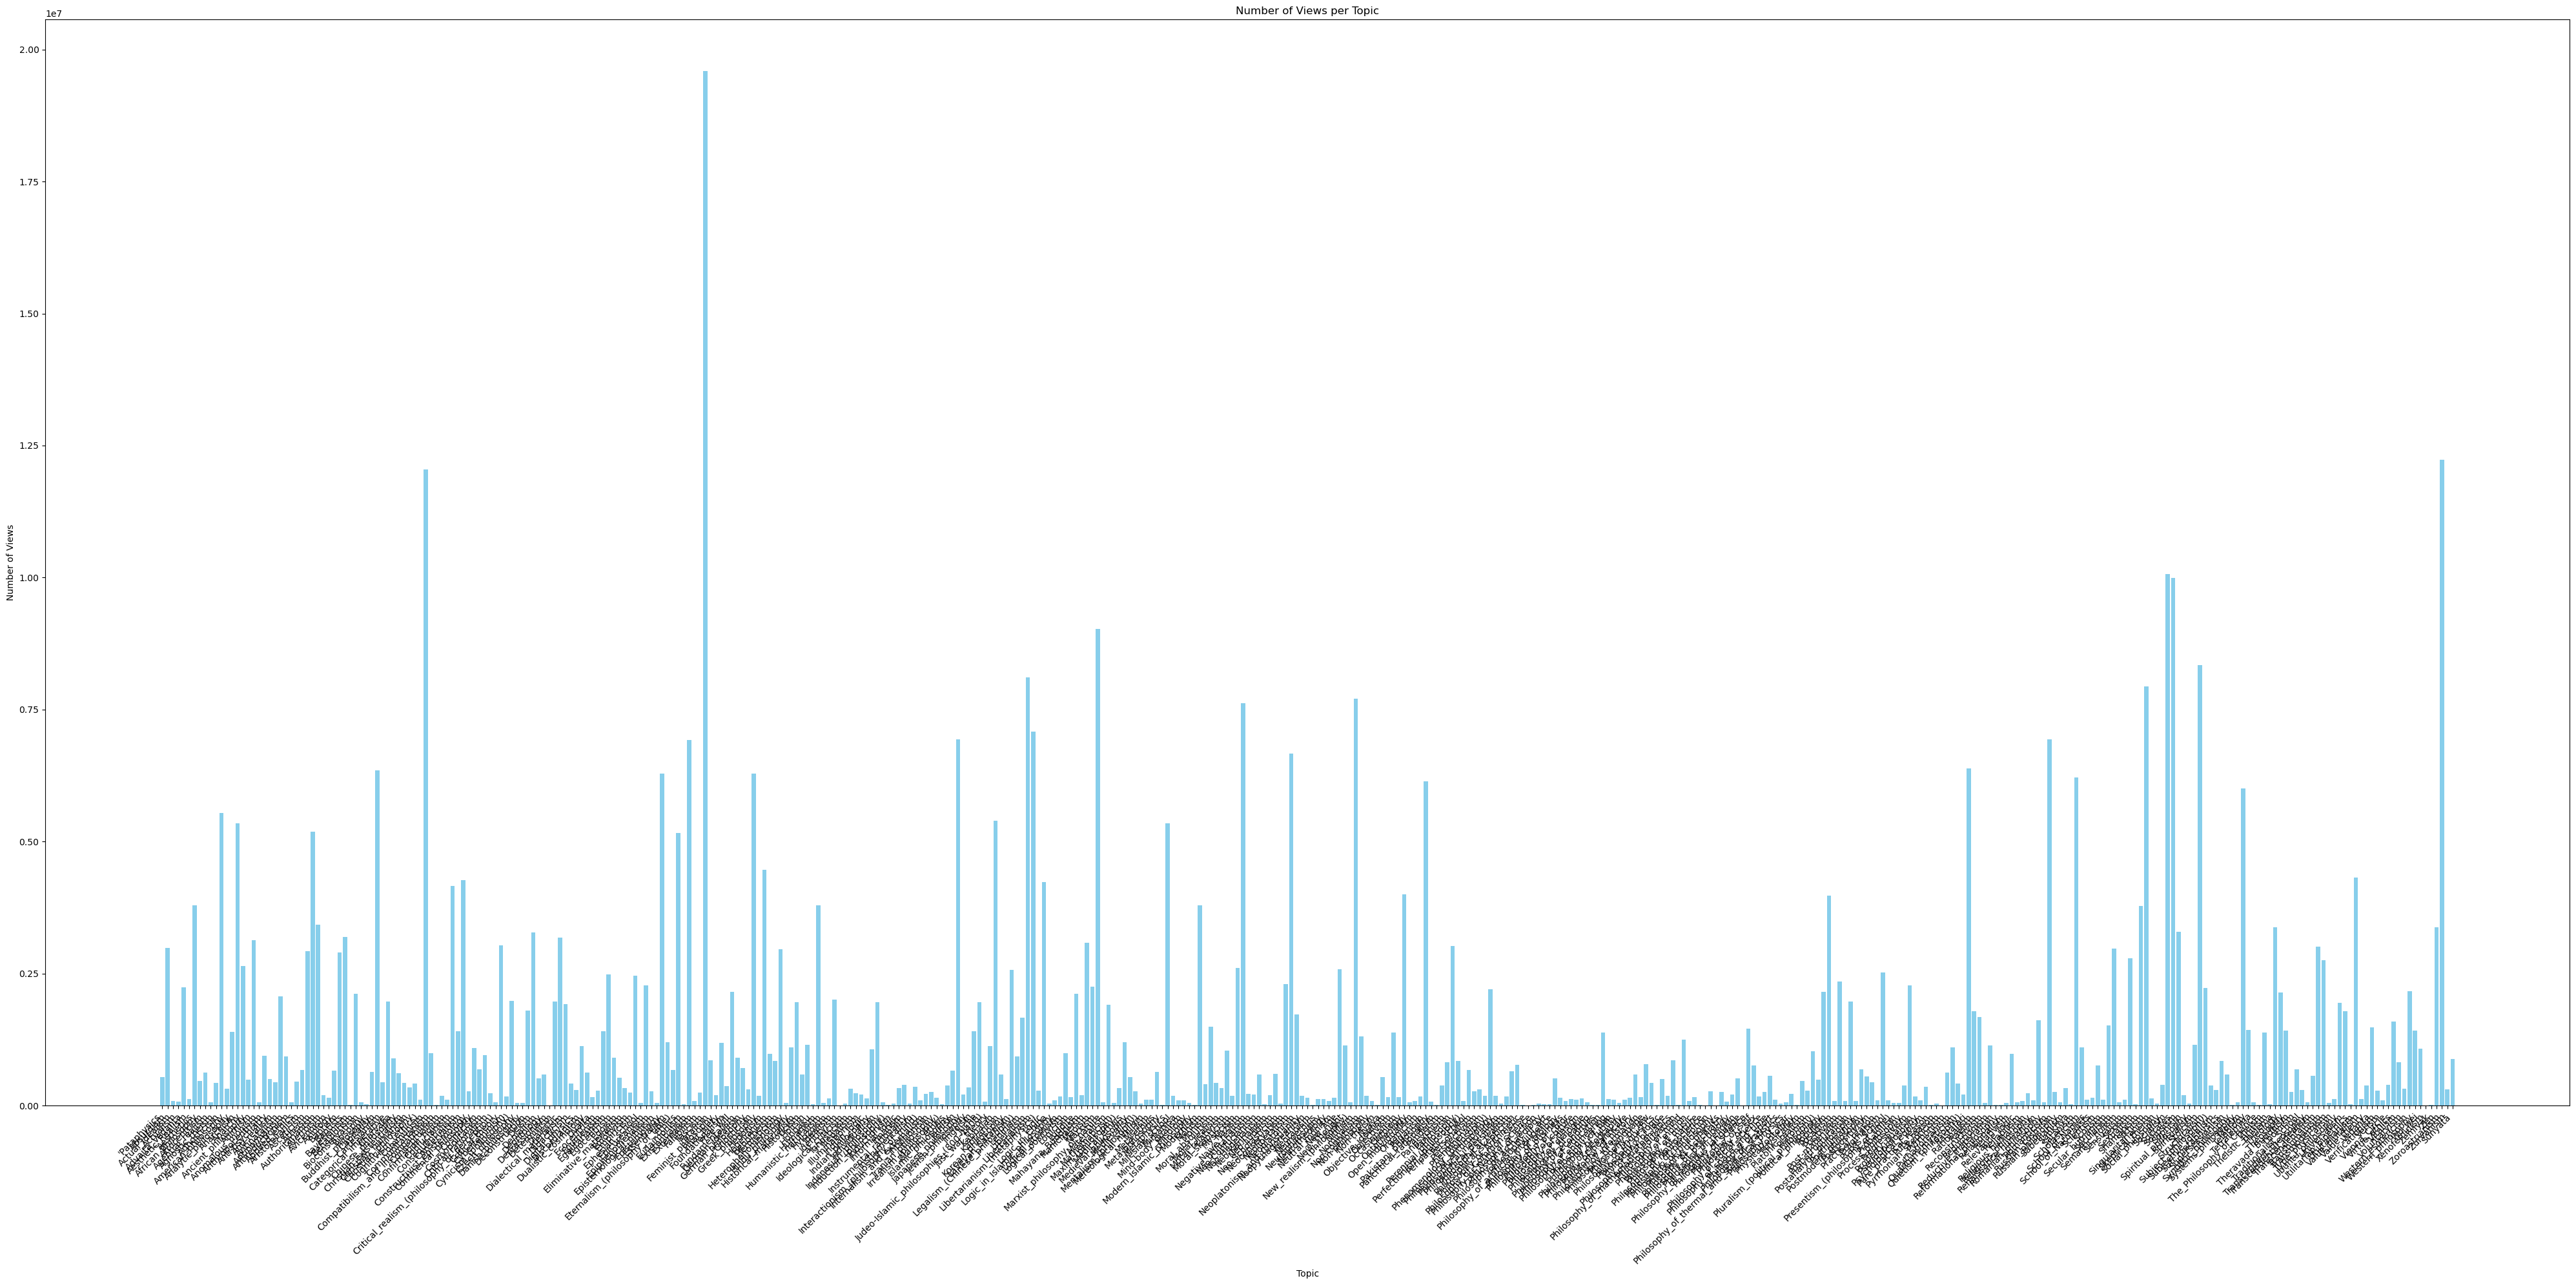

In [390]:
#Get the total number of views per topic
total_views_per_topic = philo_views_en.groupby('article')['views'].sum().reset_index()

#Plot an histogram of the total number of views per topic in order to see the distribution
plt.figure(figsize=(40, 20))
plt.bar(total_views_per_topic['article'], total_views_per_topic['views'], color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Number of Views')
plt.title('Number of Views per Topic')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

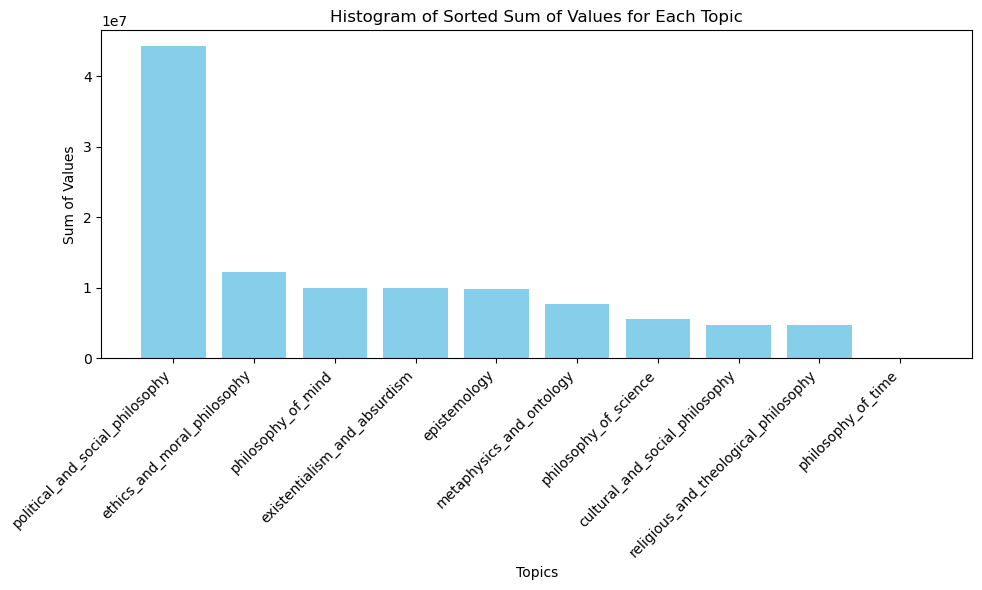

In [27]:
broader_philosophy_topics= pd.read_csv('data/BroaderTopics_en.csv')

# Sum up all rows for each column
row_sums = broader_philosophy_topics.sum(axis=0)

# Create a DataFrame with topics and corresponding row sums
sum_df = pd.DataFrame({'Topic': broader_philosophy_topics.columns, 'Sum': row_sums})

# Sort the DataFrame by the row sums
sorted_sum_df = sum_df.sort_values(by='Sum', ascending=False)

# Plotting the histogram of sorted sum values
plt.figure(figsize=(10, 6))
plt.bar(sorted_sum_df['Topic'], sorted_sum_df['Sum'], color='skyblue')
plt.xlabel('Topics')
plt.ylabel('Sum of Values')
plt.title('Histogram of Sorted Sum of Values for Each Topic')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

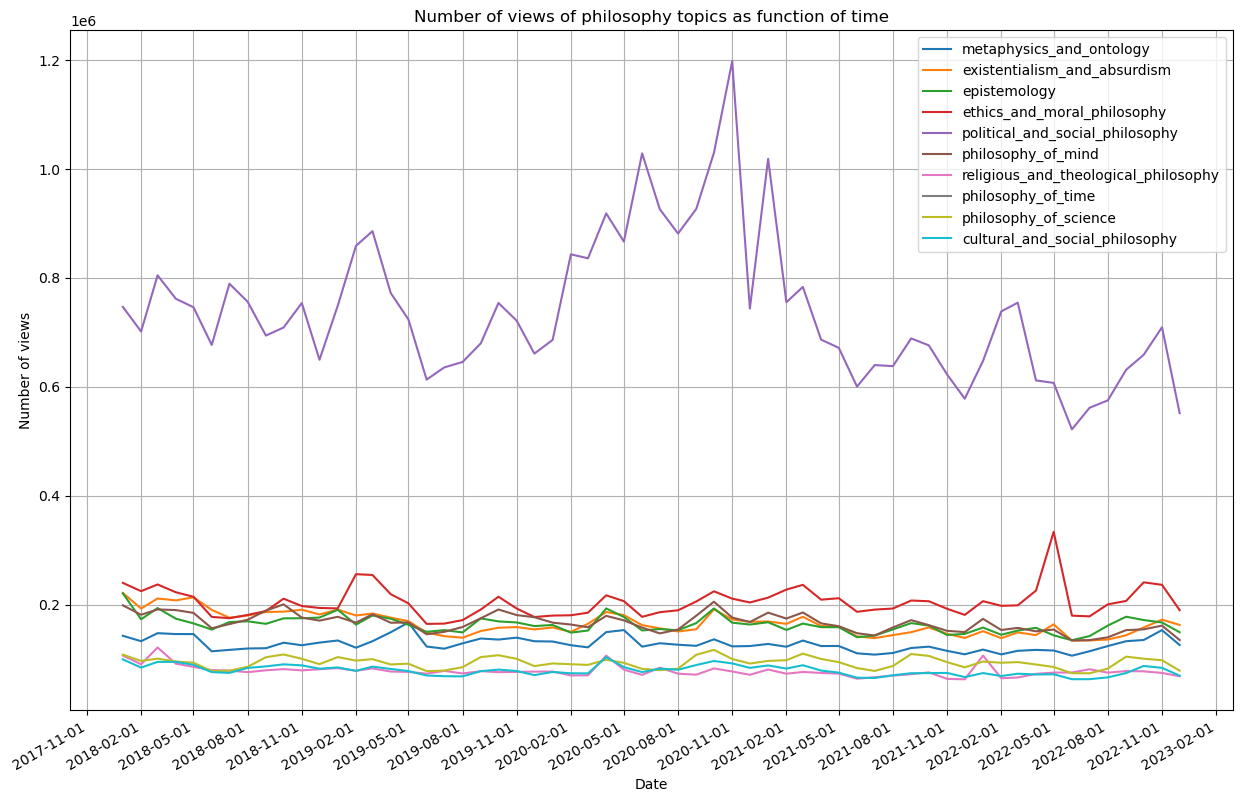

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 10))

broader_philosophy_topics.index = pd.to_datetime(broader_philosophy_topics.index, format='%Y%m%d%H')

# Loop through columns in broader_philosophy_topics and plot each series against time
for column in broader_philosophy_topics.columns:
    ax.plot(broader_philosophy_topics.index, broader_philosophy_topics[column], label=column)


ax.set(xlabel='Date', ylabel='Number of views',
       title='Number of views of philosophy topics as function of time')
ax.grid()
ax.legend()
fig.autofmt_xdate()

# Display date once every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set interval to 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

/var/folders/1d/mrjskb4j41jdty_41nyblpxw0000gn/T/ipykernel_49844/2538508759.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  broader_philosophy_topics_relative[column] = broader_philosophy_topics[column].pct_change()


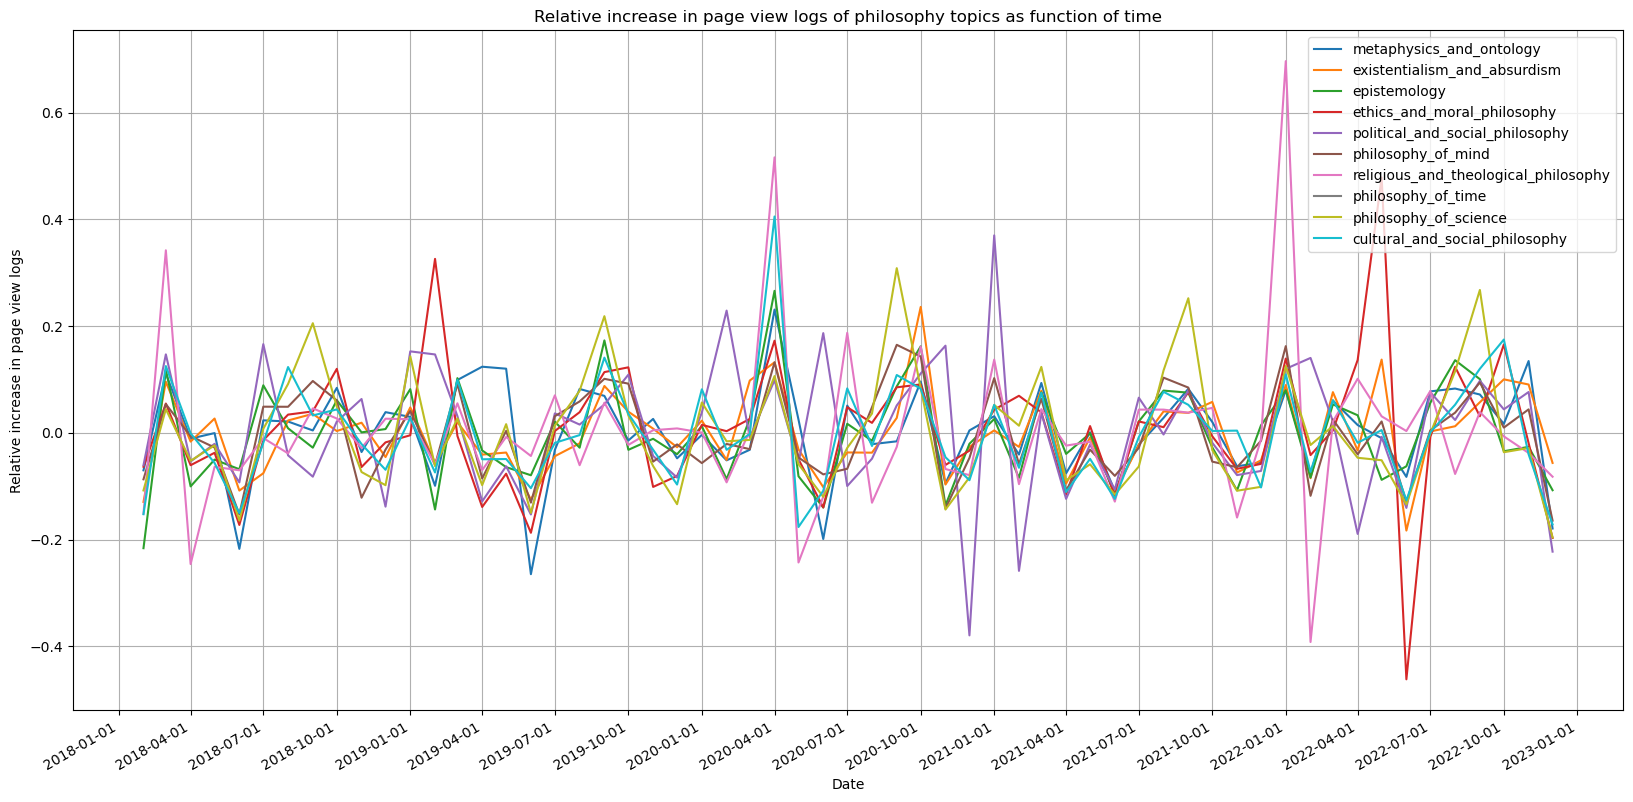

In [29]:
#For each broader philosophy plot the relative increase in page view logs
# Create an empty DataFrame to store the relative increase in page view logs
broader_philosophy_topics_relative = pd.DataFrame()

# Add relative increase in page view logs columns for each philosophy topic to the broader dataset, use for loop 
for column in broader_philosophy_topics.columns:
    broader_philosophy_topics_relative[column] = broader_philosophy_topics[column].pct_change()

#plot
fig, ax = plt.subplots(figsize=(20, 10))

broader_philosophy_topics_relative.index = pd.to_datetime(broader_philosophy_topics_relative.index, format='%Y%m%d%H')

# Loop through columns in broader_philosophy_topics and plot each series against time
for column in broader_philosophy_topics_relative.columns:
    ax.plot(broader_philosophy_topics_relative.index, broader_philosophy_topics_relative[column], label=column)

ax.set(xlabel='Date', ylabel='Relative increase in page view logs',
 title='Relative increase in page view logs of philosophy topics as function of time')
ax.grid()
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()



In [30]:
#Starting from february 2020 to july 2022, compute histogram of relative increases in page view logs for each broader philosophy topic


### Get the views for the diffrent languages

In [393]:
section_titles = np.load('data/section_titles.npy')

In [36]:
language_links = cd.get_url_list(target_languages,section_titles)

In [37]:
Views_all_lang=cd.get_page_views_by_languages(language_links,section_titles)

Error: 404
%E5%AE%9F%E5%9C%A8%E8%AB%96%E7%9A%84%E8%A6%B3%E5%BF%B5%E8%AB%96
Error: 404
%E7%BE%8E%E7%9A%84%E7%8F%BE%E5%AE%9F%E4%B8%BB%E7%BE%A9
Error: 404
Afrocentrism
Error: 404
Antinatalisme
Error: 404
Monisme_anomal
Error: 404
Biosophie
Error: 404
Philosophie_des_Zufalls
Error: 404
%E3%82%AD%E3%83%AA%E3%82%B9%E3%83%88%E6%95%99%E5%AE%9F%E5%AD%98%E4%B8%BB%E7%BE%A9
Error: 404
%EA%B8%B0%EB%8F%85%EA%B5%90%EC%A0%81_%EC%8B%A4%EC%A1%B4%EC%A3%BC%EC%9D%98
Error: 404
Metaethik#Kognitivismus
Error: 404
Communautarisme_(concept_politique)
Error: 404
Holisme_de_confirmation
Error: 404
Kosmisk_skr%C3%A4ck
Error: 404
Metaethik#Emotivismus
Error: 404
Vestlig_esoterik
Error: 404
Logica_informale
Error: 404
Logica_informale
Error: 404
%E9%81%93%E5%BE%B3%E7%9A%84%E7%9B%B8%E5%AF%BE%E4%B8%BB%E7%BE%A9
Error: 404
%D0%9D%D0%BE%D0%B2%D0%B0_%D0%BC%D0%B8%D1%81%D0%B0%D0%BE
Error: 404
Metaethik#Nonkognitivismus
Error: 404
%EC%97%B4%EB%A6%B0_%EA%B0%9C%EC%9D%B8%EC%A3%BC%EC%9D%98
Error: 404
Perenn_filosofi
Error: 404


In [43]:
#finding total visits over 5 years:
Total_per_lang=Views_all_lang.groupby(['article','code','subject']).sum('views').sort_values(['subject','views'])
#Total_per_lang.head(500)
columns_to_remove = ['granularity','access','agent']
Views_all_lang.drop(columns=columns_to_remove,inplace=True)
Views_all_lang.to_csv('data/Philos_lang.csv',index=False)

### TEST POUR REGRESSION

In [255]:
df=pd.read_csv('data/Philo_en.csv')
df.head(10)

,project,article,timestamp,views
0,en.wikipedia,Absurdism,2018010100,50296
1,en.wikipedia,Absurdism,2018020100,44655
2,en.wikipedia,Absurdism,2018030100,50593
3,en.wikipedia,Absurdism,2018040100,50871
4,en.wikipedia,Absurdism,2018050100,48368
5,en.wikipedia,Absurdism,2018060100,39999
6,en.wikipedia,Absurdism,2018070100,38434
7,en.wikipedia,Absurdism,2018080100,41725
8,en.wikipedia,Absurdism,2018090100,42433
9,en.wikipedia,Absurdism,2018100100,45667


In [362]:
df_pivoted = df.pivot_table(index='timestamp'   ,columns='article', values='views')

total_views_per_date = df.groupby('timestamp')['views'].sum()
# Merge the total views per date back to the original DataFrame
df_pivoted['ViewsTotal']=total_views_per_date

df_pivoted.head(10)
df_reg_en = df_pivoted.fillna(0)
df_reg_en.columns = df_reg_en.columns.str.replace('_', ' ')
print(df_reg_en.columns[0])
df_reg_en.rename(columns={"'Pataphysics":'Pataphysics'}, inplace=True)
df_reg_en.to_csv('data/df_en.csv')
df_reg_en.head(10)

'Pataphysics


article,Pataphysics,Absurdism,Actual idealism,Actualism,Advaita Vedanta,Aesthetic Realism,Aesthetics,African philosophy,Afrocentrism,Agential realism,...,Western esotericism,Western philosophy,Wu wei,Xenofeminism,Zemlyak,Zen,Zoroastrianism,Zurvanism,Śūnyatā,ViewsTotal
timestamp,,,,,,,,,,,,,,,,,,,,,
2018010100,8017.0,50296.0,1121.0,1472.0,35189.0,1336.0,73256.0,6958.0,11213.0,131.0,...,31236.0,21567.0,16640.0,0.0,266.0,64463.0,195214.0,5508.0,12817.0,9592029
2018020100,7508.0,44655.0,1040.0,1608.0,30818.0,1290.0,63464.0,8707.0,14480.0,130.0,...,27938.0,20180.0,15904.0,0.0,225.0,55691.0,183023.0,4834.0,12111.0,8766692
2018030100,8216.0,50593.0,1187.0,1353.0,35495.0,1328.0,68122.0,10145.0,12209.0,157.0,...,31948.0,23180.0,18443.0,0.0,226.0,65074.0,201245.0,5497.0,14253.0,9749747
2018040100,7873.0,50871.0,1076.0,1521.0,34953.0,1564.0,65982.0,9027.0,10951.0,162.0,...,31169.0,21950.0,17623.0,0.0,232.0,63450.0,174063.0,5191.0,14059.0,9139317
2018050100,8086.0,48368.0,1030.0,1241.0,31775.0,1575.0,64248.0,8573.0,13073.0,128.0,...,30943.0,20448.0,16293.0,0.0,222.0,62945.0,190677.0,5597.0,13665.0,8917503
2018060100,6950.0,39999.0,915.0,958.0,31980.0,1198.0,62712.0,6765.0,9999.0,106.0,...,31104.0,27822.0,14887.0,0.0,225.0,55655.0,161284.0,4700.0,12308.0,7990731
2018070100,7922.0,38434.0,931.0,1089.0,31205.0,1268.0,62804.0,6957.0,9557.0,148.0,...,33655.0,30409.0,14985.0,0.0,236.0,56916.0,199037.0,5035.0,12723.0,8250353
2018080100,7370.0,41725.0,999.0,1045.0,34403.0,1429.0,62429.0,8484.0,10098.0,135.0,...,33812.0,27409.0,14933.0,0.0,239.0,57488.0,177505.0,4506.0,12692.0,8433149
2018090100,7548.0,42433.0,901.0,1054.0,36102.0,1400.0,60525.0,7611.0,8801.0,106.0,...,31423.0,24418.0,14406.0,0.0,347.0,53965.0,188516.0,4536.0,12065.0,8544544


In [385]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# Since we took entire columns of the originial dataframe, we are sure that the matrix returned will have the same dimensions as the original dataframe
def numpy_helper(df, cols):
    return np.array(df[cols]).astype(float)

def get_coeff (code):
    path ='data/df_'+code+'.csv'
    df_reg=pd.read_csv(path)
    # Create a list of the column names to be used for the X and Y matrix
    column_names_x = df_reg.columns[1:-1]
    #print(column_names_x)
    column_name_y = ['ViewsTotal']
    # Create the X and Y matrix, we use .flatten() to make sure that the Y matrix is a 1D array
    X_train = numpy_helper(df_reg, column_names_x)
    y_train = numpy_helper(df_reg, column_name_y).flatten()

    # Create a linear regression model
    model = LinearRegression()
    # Fit the model to your data
    model.fit(X_train, y_train)
    print(model.score(X_train,y_train))
    return model.coef_


In [381]:
philo_lang = pd.read_csv('data/Philos_lang.csv')
philo_lang.drop(['project','article'],axis=1,inplace=True)
philo_lang.head(30)

,timestamp,views,subject,code
0,2018010100,10119,Absurdism,fr
1,2018020100,8507,Absurdism,fr
2,2018030100,9485,Absurdism,fr
3,2018040100,9772,Absurdism,fr
4,2018050100,11073,Absurdism,fr
5,2018060100,15545,Absurdism,fr
6,2018070100,4390,Absurdism,fr
7,2018080100,3062,Absurdism,fr
8,2018090100,6477,Absurdism,fr
9,2018100100,7958,Absurdism,fr


In [382]:
df_en = pd.read_csv('data/df_en.csv')

for lang in target_languages:
    df_piv = philo_lang[philo_lang['code']==lang].pivot_table(index='timestamp',columns='subject', values='views')

    total_views_per_date = philo_lang[philo_lang['code']==lang].groupby('timestamp')['views'].sum()
    # Merge the total views per date back to the original DataFrame
    df_piv['ViewsTotal']=total_views_per_date

    #df_piv.head(10)
    

    # Identify missing columns in each DataFrame
    missing_cols= df_en.columns.difference(df_piv.columns)
    #print(missing_cols)

    # Add missing columns with NaN values
    df_piv = pd.concat([df_piv, pd.DataFrame(columns=missing_cols)], axis=1)

    # Reorder columns while keeping values in the correct order
    df_piv = df_piv.loc[:, df_en.columns]
    df_piv.drop(columns='timestamp',inplace=True)
    #df_piv.set_index('Unnamed: 0', inplace=True)
    #df_piv.rename(columns={'Unnamed: 0':'timestamp'})
    #print(df_piv.index)



    df_reg = df_piv.fillna(0) 
    print(df_reg.columns[0])
    df_reg.drop(columns=df_reg.columns[0])
    df_reg.rename(columns={"'Pataphysics":'Pataphysics'},inplace=True)
    #print(df_reg.index)
    ##print(df_reg.columns[0])
    filepath = 'data/df_'+lang+'.csv'
    df_reg.to_csv(filepath,index='False')


    

Pataphysics
Pataphysics
Pataphysics
Pataphysics
Pataphysics
Pataphysics
Pataphysics
Pataphysics
Pataphysics
Pataphysics
Pataphysics


In [386]:
df_fr= pd.read_csv('data/df_fr.csv')
#df_fr.set_index('Unnamed: 0', inplace=True)
df_fr.head(15)
#df_fr.rename(columns={'Unnamed: 0':'timestamp'})


,Unnamed: 0,Pataphysics,Absurdism,Actual idealism,Actualism,Advaita Vedanta,Aesthetic Realism,Aesthetics,African philosophy,Afrocentrism,...,Western esotericism,Western philosophy,Wu wei,Xenofeminism,Zemlyak,Zen,Zoroastrianism,Zurvanism,Śūnyatā,ViewsTotal
0,2018010100,0,10119.0,10851.0,3599.5,44811.0,156.0,11254.0,14202.0,940.0,...,947.5,0,0,0,0,0,0,0,0,1471362
1,2018020100,0,8507.0,9381.0,3188.5,29874.0,185.0,9034.0,14123.0,795.0,...,725.0,0,0,0,0,0,0,0,0,1259668
2,2018030100,0,9485.0,10064.0,3057.0,52105.0,186.0,10926.0,16191.0,913.0,...,847.5,0,0,0,0,0,0,0,0,1447906
3,2018040100,0,9772.0,9433.0,2568.5,37899.0,165.0,11083.0,14500.0,1004.0,...,788.0,0,0,0,0,0,0,0,0,1321198
4,2018050100,0,11073.0,10056.0,2392.0,36130.0,133.0,12725.0,16673.0,802.0,...,756.5,0,0,0,0,0,0,0,0,1425394
5,2018060100,0,15545.0,7932.0,1582.5,35148.0,124.0,9180.0,13742.0,718.0,...,634.0,0,0,0,0,0,0,0,0,1259464
6,2018070100,0,4390.0,5065.0,1255.0,28148.0,111.0,7693.0,12212.0,941.0,...,495.0,0,0,0,0,0,0,0,0,892891
7,2018080100,0,3062.0,5405.0,1368.5,37861.0,153.0,8191.0,14852.0,1067.0,...,521.0,0,0,0,0,0,0,0,0,1003065
8,2018090100,0,6477.0,10500.0,2203.5,30889.0,157.0,9605.0,18922.0,1069.0,...,638.0,0,0,0,0,0,0,0,0,1340014
9,2018100100,0,7958.0,11661.0,3400.5,31826.0,216.0,11421.0,15000.0,1071.0,...,881.5,0,0,0,0,0,0,0,0,1536295


In [387]:
all_languages = ['en','fr', 'ja', 'de', 'it','da','nl','no','sr','sv','ko','fi']
coeffs =np.empty((0,427))
for lang in all_languages :
    coeff = get_coeff(lang)
    #print(lang)
    #print(coeff)
    coeffs = np.vstack((coeffs,coeff))
    

1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [388]:
np.shape(coeffs)

(12, 427)

In [368]:
df_en = pd.read_csv('data/df_en.csv')
subjects = df_en.columns[1:-1]
len(subjects)

427

In [369]:
df_coeff=pd.DataFrame(coeffs,index=all_languages, columns=subjects)

In [370]:
df_coeff

,Pataphysics,Absurdism,Actual idealism,Actualism,Advaita Vedanta,Aesthetic Realism,Aesthetics,African philosophy,Afrocentrism,Agential realism,...,Voluntaryism,Western esotericism,Western philosophy,Wu wei,Xenofeminism,Zemlyak,Zen,Zoroastrianism,Zurvanism,Śūnyatā
en,5.448458e-01,1.016543,1.509097e-01,1.115423e-01,2.282467e+00,1.111286e-01,1.260843e+00,0.702456,0.069268,1.541291e-01,...,0.288208,1.580369,0.934707,0.939637,0.05609,0.002972,0.717466,1.033032,0.319712,0.891442
fr,1.101341e-13,1.385407,1.038324e+00,2.027660e+00,9.991508e-01,9.809663e-02,5.259251e-03,0.417731,0.196230,8.398521e-02,...,0.000000,0.396505,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ja,-6.927792e-14,0.561695,9.090836e-01,9.757769e-02,2.139543e+00,3.629336e-01,1.396101e+00,1.743228,0.923100,3.219647e-15,...,0.000000,1.047055,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
de,1.154632e-13,0.809243,1.370684e+00,1.902978e-01,1.907978e+00,-3.330669e-15,-6.919479e-02,0.794832,0.654450,1.379405e-01,...,0.000000,0.833461,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
it,-4.085621e-14,0.329340,1.444702e+00,7.634704e-02,1.842173e+00,1.051577e-01,1.844379e+00,1.000167,0.672287,1.865120e-01,...,0.000000,0.317710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
da,-1.065814e-14,0.908655,1.019849e+00,7.512818e-01,7.993606e-15,9.998611e-01,2.244587e-01,0.451998,1.054792,6.106227e-15,...,0.000000,0.888421,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
nl,-2.486900e-14,1.584710,1.935867e+00,9.066576e-02,2.925328e-01,1.162941e+00,4.797880e-01,1.640889,0.961902,9.992007e-16,...,0.000000,0.568915,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
no,5.773160e-14,0.307490,1.470463e+00,-1.276756e-15,1.081093e+00,2.349595e+00,2.309264e-14,1.551187,0.928250,1.106077e+00,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
sr,3.552714e-15,0.906206,4.962465e-01,3.552714e-15,3.722837e-01,1.046310e+00,5.444894e-02,1.343937,1.876800,4.943407e-01,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
sv,-3.552714e-15,1.233029,1.101444e+00,-6.661338e-16,2.991974e-01,9.509306e-01,2.479520e-01,0.982301,1.272628,4.773292e-01,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


# C'est le bordel mais ca c'est le dataframe avec les coeff de la reg lineaire par langue 

## ANOVA : 

# Test avec DF FR

In [374]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a formula dynamically
independent_variables = df_fr.columns[1:-1]
formula = 'ViewsTotal ~ ' + ' + '.join(independent_variables)
print(formula)

# Fit a multiple linear regression model
model = ols(formula, data=df_fr).fit()

# Perform ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)


ViewsTotal ~ Pataphysics + Absurdism + Actual idealism + Actualism + Advaita Vedanta + Aesthetic Realism + Aesthetics + African philosophy + Afrocentrism + Agential realism + Agnostic theism + Agnosticism + American philosophy + Analytic philosophy + Anarchism + Anarchy + Ancient philosophy + Animism + Anomalous monism + Anthropocentrism + Anti-psychiatry + Anti-realism + Antinatalism + Antinomianism + Antireductionism + Applied ethics + Aristotelianism + Asceticism + Atheism + Authoritarianism + Averroism + Avicennism + Axiology + Baptism + Baptists + Bayesianism + Behaviorism + Bioconservatism + Biosophy + Buddhist philosophy + Capitalism + Cartesianism + Categorical imperative + Charvaka + Chinese philosophy + Christian existentialism + Christian humanism + Christian philosophy + Cognitivism (ethics) + Communism + Communitarianism + Compatibilism and incompatibilism + Conceptualism + Confirmation holism + Confucianism + Consequentialism + Conservatism + Constructivist epistemology +

PatsyError: error tokenizing input (maybe an unclosed string?)
    ViewsTotal ~ Pataphysics + Absurdism + Actual idealism + Actualism + Advaita Vedanta + Aesthetic Realism + Aesthetics + African philosophy + Afrocentrism + Agential realism + Agnostic theism + Agnosticism + American philosophy + Analytic philosophy + Anarchism + Anarchy + Ancient philosophy + Animism + Anomalous monism + Anthropocentrism + Anti-psychiatry + Anti-realism + Antinatalism + Antinomianism + Antireductionism + Applied ethics + Aristotelianism + Asceticism + Atheism + Authoritarianism + Averroism + Avicennism + Axiology + Baptism + Baptists + Bayesianism + Behaviorism + Bioconservatism + Biosophy + Buddhist philosophy + Capitalism + Cartesianism + Categorical imperative + Charvaka + Chinese philosophy + Christian existentialism + Christian humanism + Christian philosophy + Cognitivism (ethics) + Communism + Communitarianism + Compatibilism and incompatibilism + Conceptualism + Confirmation holism + Confucianism + Consequentialism + Conservatism + Constructivist epistemology + Continental philosophy + Cosmicism + Cosmopolitanism + Critical rationalism + Critical realism (philosophy of perception) + Critical theory + Cyberfeminism + Cynicism (philosophy) + Czech philosophy + Danish philosophy + Deconstruction + Deism + Denialism + Deontology + Depressionism + Determinism + Dialectic + Dialectical materialism + Didacticism + Digital physics + Discordianism + Dualistic cosmology + Dvaita + Ecocentrism + Ecumenism + Egalitarianism + Egocentrism + Egoism + Eliminative materialism + Emotivism + Empiricism + Ephesian school + Epicureanism + Epiphenomenalism + Epistemological nihilism + Epistemology + Essentialism + Eternalism (philosophy of time) + Ethics + Eudaimonism + Existentialism + Externalism + Fallibilism + Fascism + Fatalism + Feminist philosophy + Filial piety + Foundationalism + Free will + Fundamentalism + German idealism + German philosophy + Gnosticism + Greek philosophy + Hedonism + Hegelianism + Henotheism + Hermeticism + Heterophenomenology + Hindu philosophy + Historical materialism + Historicism + Holism + Hongaku + Humanism + Humanistic naturalism + Hylozoism + Idealism + Identityism + Ideological criticism + Ignosticism + Illegalism + Illuminationism + Indian logic + Indian philosophy + Individualism + Indonesian philosophy + Induction (philosophy) + Inductionism + Informal logic + Innatism + Instrumental rationality + Instrumentalism + Interactionism (philosophy of mind) + Internalism and externalism + Intuitionism + Iranian philosophy + Irrealism (philosophy) + Islamic ethics + Islamic philosophy + Jainism + Japanese philosophy + Jewish philosophy + Jingoism + Juche + Judeo-Islamic philosophies (800–1400) + Just war theory + Kabbalah + Kantianism + Korean philosophy + LaVeyan Satanism + Legalism (Chinese philosophy) + Leninism + Liberalism + Libertarianism + Libertarianism (metaphysics) + Logic + Logic in China + Logic in Islamic philosophy + Logical atomism + Logical positivism + Logicism + Luddite + Mahayana Buddhism + Manichaeism + Maoism + Marxism + Marxist philosophy of nature + Materialism + Mathematicism + Maxim (philosophy) + Medical ethics + Medieval philosophy + Medievalism + Mentalism (philosophy) + Mereological nihilism + Merism + Meta-ethics + Meta-philosophy + Metaphysics + Milesian school + Mimamsa + Mind-body dualism + Misology + Modern Islamic philosophy + Modernism + Mohism + Monism + Moral absolutism + Moral realism + Moral relativism + Moral skepticism + Mysticism + Nazism + Naïve realism + Negative utilitarianism + Neo-Confucianism + Neo-Hegelianism + Neo-Kantianism + Neo-Luddism + Neo-Scholasticism + Neoconservatism + Neoliberalism + Neoplatonism + Neoplatonism and Christianity + Neopythagoreanism + Neotaoism + Neuroethics + Neurophilosophy + Neurotheology + Neutral monism + New Age + New Thought + New realism (philosophy) + Nihilism + Nominalism + Non-cognitivism + Non-philosophy + Non-theism + Nyaya + Objective idealism + Objectivism + Occasionalism + Ontology + Ontotheology + Open individualism + Organicism + Paganism + Pakistani philosophy + Pancritical rationalism + Pandeism + Panpsychism + Pantheism + Perennial philosophy + Perfectionism (philosophy) + Peripatetic school + Personalism + Perspectivism + Phenomenalism + Phenomenology (philosophy) + Philosophical anthropology + Philosophical naturalism + Philosophical pessimism + Philosophical realism + Philosophical skepticism + Philosophy of Arithmetic + Philosophy of Common Sense + Philosophy of Natural Science + Philosophy of action + Philosophy of archaeology + Philosophy of art + Philosophy of artificial intelligence + Philosophy of biology + Philosophy of business + Philosophy of color + Philosophy of culture + Philosophy of design + Philosophy of dialogue + Philosophy of eating + Philosophy of economics + Philosophy of education + Philosophy of engineering + Philosophy of film + Philosophy of futility + Philosophy of geography + Philosophy of healthcare + Philosophy of history + Philosophy of information + Philosophy of language + Philosophy of law + Philosophy of linguistics + Philosophy of logic + Philosophy of love + Philosophy of mathematics + Philosophy of mathematics education + Philosophy of mind + Philosophy of motion + Philosophy of music + Philosophy of nature + Philosophy of neuroscience + Philosophy of perception + Philosophy of philosophy + Philosophy of physics + Philosophy of psychiatry + Philosophy of psychology + Philosophy of religion + Philosophy of religious language + Philosophy of science + Philosophy of self + Philosophy of sex + Philosophy of social science + Philosophy of space and time + Philosophy of sport + Philosophy of statistics + Philosophy of thermal and statistical physics + Philosophy of war + Physical ontology + Physicalism + Platonic realism + Platonism + Pluralism (political philosophy) + Political philosophy + Populism + Posadism + Positivism + Post-materialism + Post-structuralism + Postanalytic philosophy + Posthumanism + Postmodern philosophy + Postpositivism + Practical reason + Pragmatism + Praxis School + Presentism (philosophy of time) + Probabilism + Process philosophy + Progressivism + Property dualism + Pseudophilosophy + Psychological egoism + Pure practical reason + Pure reason + Pyrrhonian skepticism + Pyrrhonism + Pythagoreanism + Quantum mysticism + Quietism (philosophy) + Rastafari + Rationalism + Raëlism + Reconstructivism + Reductionism + Reductive materialism + Reformational philosophy + Relationalism + Relativism + Relevance logic + Reliabilism + Religious humanism + Religious philosophy + Renaissance humanism + Romanian philosophy + Romanticism + Russian cosmism + Russian philosophy + Sabellianism + Sankhya + Satanism + Scholasticism + School of Names + School of Naturalists + Scientism + Scotism + Secular humanism + Secularism + Semantic holism + Sensualism + Sexism + Sexualism + Shamanism + Sikhism + Singularitarianism + Skeptical theism + Social philosophy + Socialism + Socrates + Solipsism + Sophism + Spiritual philosophy + Spiritualism + Stoicism + Structuralism + Subject (philosophy) + Subjective idealism + Sufi metaphysics + Supersessionism + Synoptic philosophy + Systems philosophy + Taoism + Teleology + Tetralemma + The Philosophy of Chance + Theism + Theistic finitism + Thelema + Theology + Theosophy + Theravada Buddhism + Thomism + Traditionalist School + Transcendent theosophy + Transcendental idealism + Transcendentalism + Transhumanism + Transmodernism + Type physicalism + Ubuntu philosophy + Universalism + Utilitarian bioethics + Utilitarianism + Value pluralism + Value theory + Vedanta + Verificationism + Verism + Vienna Circle + Virtue ethics + Vitalism + Voluntaryism + Western esotericism + Western philosophy + Wu wei + Xenofeminism + Zemlyak + Zen + Zoroastrianism + Zurvanism + Śūnyatā
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ^